# Example for the concept of LGU

This notebook shows how tessellation and the functionalities can help to create Local Geographic Units. Local Geographic Units are the combination of spatial discretization with additional information assigned to each tile. This conecepts makes further analysis easy. 

In [1]:
import tesspy as tp
from tesspy import Tessellation
import matplotlib.pyplot as plt
from tesspy.tessellation import count_poi_per_tile
import numpy as np
import contextily as ctx

import warnings
warnings.filterwarnings('ignore')

## Tessellation

First we define a tessellation area. In the case <b>Frankfurt am Main</b> and <b>Nairobi</b> are choosen as case study.
As tessellation method a regular method, hexagons and an irregular method, city blocks are used.

In [2]:
ffm = Tessellation("Frankfurt am Main")
africa = Tessellation("Nairobi")

In [3]:
africa_hex = africa.hexagons(resolution=9)

In [4]:
ffm_cb = ffm.city_blocks(n_polygons=1000)

MultiPolygon found. Splitting it up...


## Creating LGU datasets

Now using the function ```count_poi_per_tile``` a LGU dataset based on the tessellation and additional information (POI) is created. 

In [6]:
gdf_africa_hex = count_poi_per_tile("Nairobi", africa_hex, method="hexagons", poi_categories=["amenity","building"])
gdf_ffm_cb = count_poi_per_tile("Frankfurt", ffm_cb, method="city_blocks", poi_categories=["amenity","leisure", "office"])

In [7]:
cols_ffm = [s for s in gdf_ffm_cb.columns if "count" in s]
cols_africa = [s for s in gdf_africa_hex.columns if "count" in s]


gdf_ffm_cb["overall_count"] = np.zeros(len(gdf_ffm_cb))
for col in cols_ffm:
    gdf_ffm_cb["overall_count"] += gdf_ffm_cb[col]
    
    
gdf_africa_hex["overall_count"] = np.zeros(len(gdf_africa_hex))
for col in cols_africa:
    gdf_africa_hex["overall_count"] += gdf_africa_hex[col]

In [8]:
gdf_ffm_cb.head()

,cityblock_id,geometry,count_amenity,count_leisure,count_office,overall_count
0,cityblockID0,"POLYGON ((8.68230 50.10893, 8.68232 50.10887, ...",73,2,2,77.0
1,cityblockID1,"POLYGON ((8.67928 50.10815, 8.67876 50.10797, ...",59,1,1,61.0
2,cityblockID10,"POLYGON ((8.70392 50.13107, 8.70391 50.13109, ...",30,5,1,36.0
3,cityblockID100,"POLYGON ((8.66207 50.12438, 8.66200 50.12431, ...",56,11,1,68.0
4,cityblockID1000,"POLYGON ((8.59432 50.13878, 8.59419 50.13881, ...",1,1,1,3.0


In [9]:
gdf_africa_hex.head()

,hex_id,geometry,count_amenity,count_building,overall_count
0,897a6325b27ffff,"POLYGON ((37.07338 -1.29558, 37.07342 -1.29370...",1,1,2.0
1,897a6325b2fffff,"POLYGON ((37.07509 -1.29283, 37.07512 -1.29095...",1,1,2.0
2,897a6325b37ffff,"POLYGON ((37.07498 -1.29848, 37.07501 -1.29660...",1,1,2.0
3,897a6325ba7ffff,"POLYGON ((37.07487 -1.30413, 37.07490 -1.30225...",1,1,2.0
4,897a6325bafffff,"POLYGON ((37.07657 -1.30139, 37.07661 -1.29950...",1,1,2.0


Text(0.5, 1.0, 'Visualization of LGU of Frankfurt')

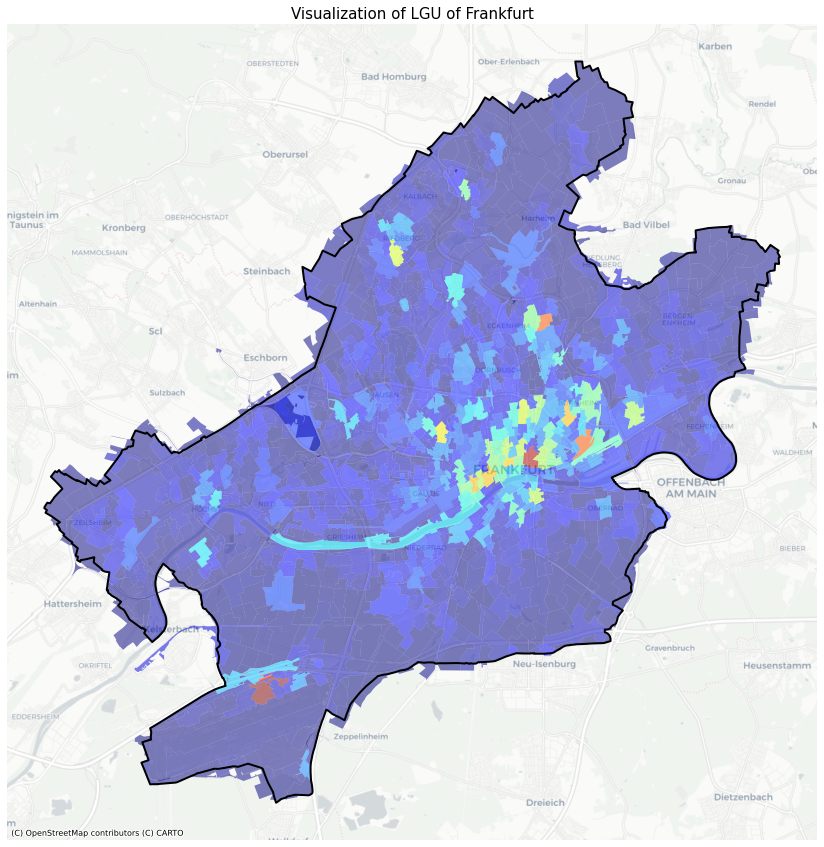

In [10]:
fig, axs = plt.subplots(figsize=(15,15))

ffm.get_polygon().to_crs('EPSG:3857').boundary.plot(ax=axs, linewidth=2, color='black')
gdf_ffm_cb.to_crs('EPSG:3857').plot(column='overall_count',cmap='jet', ax=axs,alpha=0.5)
ctx.add_basemap(ax=axs, source=ctx.providers.CartoDB.Positron, crs='EPSG:3857')


axs.axis('off')
axs.set_title(f"Visualization of LGU of Frankfurt", fontsize=15)

Text(0.5, 1.0, 'Visualization of LGU of Nairobi')

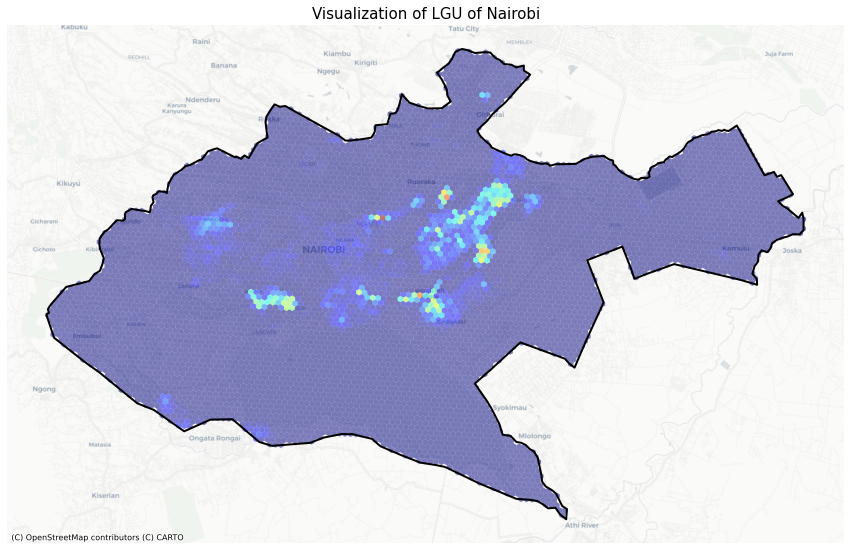

In [11]:
fig, axs = plt.subplots(figsize=(15,15))

africa.get_polygon().to_crs('EPSG:3857').boundary.plot(ax=axs, linewidth=2, color='black')
gdf_africa_hex.to_crs('EPSG:3857').plot(column='overall_count',cmap='jet', ax=axs,alpha=0.5)
ctx.add_basemap(ax=axs, source=ctx.providers.CartoDB.Positron, crs='EPSG:3857')


axs.axis('off')
axs.set_title(f"Visualization of LGU of Nairobi", fontsize=15)